# Customer Churn

"Churn Rate" is a business term describing the rate at which customers leave or cease paying for a product or service.Consequently, there's growing interest among companies to develop better churn-detection techniques, leading many to look to data mining and machine learning for new and creative approaches.
This is a post about modeling customer churn using Python.

# The DataSet
The data set I'll be using is a longstanding telecom customer data set..

The data is straightforward. Each row represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.


In [13]:
import pandas as pd
import numpy as np
churn_df=pd.read_csv('churn.csv.txt')



In [14]:
churn_df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Data Wrangling using different functions of pandas library
 
 The following code simply drops irrelevant columns and converts strings to boolean values (since models don't handle "yes" and "no" very well). The rest of the numeric columns are left untouched.

In [15]:
churn_df1=pd.get_dummies(churn_df[['Int\'l Plan','VMail Plan','Churn?']])
churn_df_new=pd.concat([churn_df1,churn_df],axis=1)
churn_df_new

,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes,Churn?_False.,Churn?_True.,State,Account Length,Area Code,Phone,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,1,0,0,1,1,0,KS,128,415,382-4657,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,0,0,1,1,0,OH,107,415,371-7191,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,1,0,1,0,1,0,NJ,137,415,358-1921,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,0,1,1,0,1,0,OH,84,408,375-9999,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,0,1,1,0,1,0,OK,75,415,330-6626,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,0,1,1,0,1,0,AL,118,510,391-8027,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,1,0,0,1,1,0,MA,121,510,355-9993,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,0,1,1,0,1,0,MO,147,415,329-9001,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,1,0,1,0,1,0,LA,117,408,335-4719,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,0,1,0,1,1,0,WV,141,415,330-8173,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [4]:
col=['State','Area Code','Phone','Int\'l Plan','VMail Plan','Churn?']
churn_df_new= churn_df_new.drop(col,axis=1)
churn_df_new

,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes,Churn?_False.,Churn?_True.,Account Length,VMail Message,Day Mins,Day Calls,...,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,1,0,0,1,1,0,128,25,265.1,110,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,0,0,1,1,0,107,26,161.6,123,...,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,1,0,1,0,1,0,137,0,243.4,114,...,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,1,1,0,1,0,84,0,299.4,71,...,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,1,1,0,1,0,75,0,166.7,113,...,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
5,0,1,1,0,1,0,118,0,223.4,98,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
6,1,0,0,1,1,0,121,24,218.2,88,...,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3
7,0,1,1,0,1,0,147,0,157.0,79,...,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0
8,1,0,1,0,1,0,117,0,184.5,97,...,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
9,0,1,0,1,1,0,141,37,258.6,84,...,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0


# Train-Test split using sklearn library

To split the given DataSet into Training Data and Test Data and import different models of Machine Learning from sklearn library.


In [16]:
from sklearn.model_selection import train_test_split


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier 


# Visualization

Visualizing a DataSet to get a more clear insight of Data by using Matplotlib Library of Python.


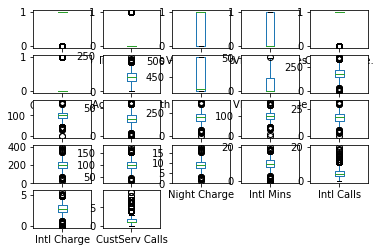

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
churn_df_new.plot(kind='box',subplots=True,layout=(5,5),sharex=False,sharey=False)
plt.show()

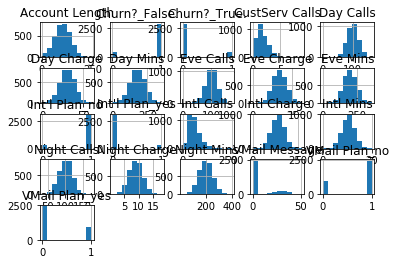

In [8]:
churn_df_new.hist()
plt.show()

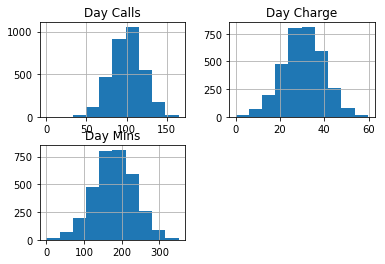

In [32]:
X.hist()
plt.show()

In [20]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

In [22]:
seed = 7
scoring = 'accuracy'

In [23]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print (msg)

C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LR: 0.853144 (0.024968)


C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LDA: 0.853544 (0.025043)


C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was

KNN: 0.867145 (0.022973)
CART: 0.773520 (0.028278)
NB: 0.870352 (0.021535)


C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

SVM: 0.852744 (0.024368)


# Train Test Contains Five Features


In [24]:
X=churn_df_new[['Day Mins','Day Calls','Day Charge','Eve Mins','Eve Calls','Eve Charge','Night Mins']]
Y=churn_df_new[['Churn?_False.']]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
X_test

,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins
599,214.1,62,36.40,200.9,111,17.08,246.8
3215,156.6,84,26.62,161.5,96,13.73,294.6
2652,181.8,117,30.91,158.1,91,13.44,266.2
526,227.4,88,38.66,182.5,100,15.51,191.7
830,167.7,94,28.51,93.7,121,7.96,241.3
3012,109.8,100,18.67,189.6,104,16.12,206.7
2969,110.9,54,18.85,213.4,82,18.14,186.2
1817,167.8,119,28.53,142.0,123,12.07,190.7
1901,206.2,100,35.05,211.2,118,17.95,196.2
531,163.0,112,27.71,219.1,89,18.62,233.4


In [25]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LR: 0.849126 (0.026928)


C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

LDA: 0.849526 (0.027175)


C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was

KNN: 0.869942 (0.019820)
CART: 0.789512 (0.023100)
NB: 0.871539 (0.019130)


C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

SVM: 0.847926 (0.026743)


# Scaling some features of a DataSet


In [26]:
features=churn_df_new.columns
x=churn_df_new.as_matrix().astype(np.float)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x)

ValueError: could not convert string to float: 'False.'

In [27]:
results = []
names = []

In [39]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

LR: 0.852737 (0.019196)


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

LDA: 0.855537 (0.020778)


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

KNN: 0.870747 (0.020564)
CART: 0.785920 (0.026386)
NB: 0.873547 (0.015839)


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

SVM: 0.851137 (0.020087)


In [28]:
from sklearn.ensemble  import RandomForestClassifier
mdl=RandomForestClassifier(n_estimators=5,random_state=5).fit(X_train,Y_train)

C:\Users\ssdn\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [29]:
mdl.score(X_train,Y_train)

0.97398959583833533

In [30]:
mdl.score(X_test,Y_test)

0.88009592326139086

# Confusion Matrix

A confusion matrix is a way of visualizing predictions made by a classifier and is just a table showing the distribution of predictions for a specific class. The x-axis indicates the true class of each observation (if a customer churned or not) while the y-axis corresponds to the class predicted by the model (if my classifier said a customer would churned or not).



In [31]:
classifier = SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, Y_train).predict(X_test)


C:\Users\ssdn\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
classifier.score(X_train,Y_train)
import itertools

Confusion matrix, without normalization
[[  0 111]
 [  0 723]]
Normalized confusion matrix
[[ 0.  1.]
 [ 0.  1.]]


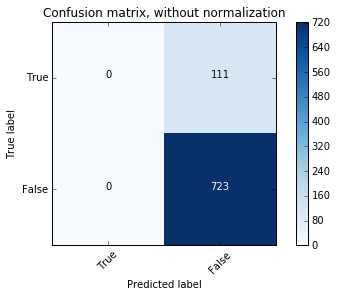

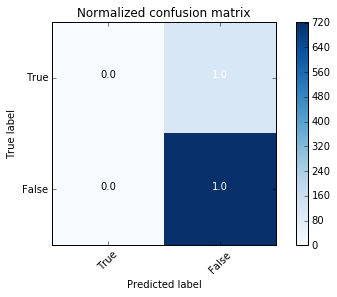

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[True,False],
                      title='Confusion matrix, without normalization')


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[True,False], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [46]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()

    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

In [48]:
y=churn_df_new['Churn?_False.']
y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      0
11      1
12      1
13      1
14      1
15      0
16      1
17      1
18      1
19      1
20      1
21      0
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3303    1
3304    0
3305    1
3306    1
3307    1
3308    1
3309    1
3310    1
3311    1
3312    1
3313    1
3314    1
3315    1
3316    1
3317    1
3318    1
3319    1
3320    0
3321    1
3322    0
3323    0
3324    1
3325    1
3326    1
3327    1
3328    1
3329    1
3330    1
3331    1
3332    1
Name: Churn?_False., Length: 3333, dtype: uint8

In [51]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN

def accuracy(y_true,y_pred):
    
    return np.mean(y_true == y_pred)

print ("Support vector machines:")
print ("%.3f" % accuracy(y, run_cv(x,y,SVC)))
print ("Random forest:")
print ("%.3f" % accuracy(y, run_cv(x,y,RF)))
print ("K-nearest-neighbors:")
print ("%.3f" % accuracy(y, run_cv(x,y,KNN)))

Support vector machines:
0.855
Random forest:
1.000
K-nearest-neighbors:
0.879
